### Student Information
Name:賴彥宇

Student ID:111062532

GitHub ID:gogodi1234

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# Second

## 1.Data Preparation

In [1]:
### Begin Assignment Here
import pandas as pd
import helpers.data_mining_helpers as dmh

#Divide files into sentences and scores
amazon_sentence, amazon_score = dmh.split_txt('amazon_cells_labelled.txt') #split_txt => Split each of line in file with '\t'
imdb_sentence, imdb_score = dmh.split_txt('imdb_labelled.txt')
yelp_sentence, yelp_score = dmh.split_txt('yelp_labelled.txt')

#Merge 3 file to one sentence list and one score list
Sentence = amazon_sentence + imdb_sentence + yelp_sentence
Score = amazon_score + imdb_score + yelp_score
print(Sentence[:10])
print(Score[:10])

['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.']
['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']


## 2.Data Transformation

In [2]:
#use dictionary to construct dataframe
d = {'sentence' : Sentence, 'score' : Score}
X = pd.DataFrame(d)
X

sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
...                                                 ...   ...
2995  I think food should have flavor and texture an...     0
2996                           Appetite instantly gone.     0
2997  Overall I was not impressed and would not go b...     0
2998  The whole experience was underwhelming, and I ...     0
2999  Then, as if I hadn't wasted enough of my life ...     0

[3000 rows x 2 columns]

In [3]:
len(X)

3000

In [4]:
X[0:2]

sentence score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1

In [5]:
for t in X["sentence"][:3]:   
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [6]:
X.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [7]:
X.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

## 3.Missing values

In [8]:
X.isnull()

sentence  score
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
2995     False  False
2996     False  False
2997     False  False
2998     False  False
2999     False  False

[3000 rows x 2 columns]

In [9]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [10]:
X.isnull().apply(lambda x: dmh.check_missing_values(x) , axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [11]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])
dummy_series

sentence    dummy_record
dtype: object

In [12]:
dummy_series.to_frame().T

sentence
0  dummy_record

In [13]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [14]:
len(result_with_series)

3001

In [15]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [16]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
              }]

In [17]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [18]:
len(X)

3001

In [19]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [20]:
X.dropna(inplace=True)

In [21]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [22]:
len(X)

3000

## 4.Duplicate Data

In [23]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [24]:
sum(X.duplicated())  #檢查...是否有true   每個colume的值都一樣才為duplicated

18

In [25]:
sum(X.duplicated('sentence'))  #There are 18 repeated sentences

18

In [26]:
X.drop_duplicates(keep=False, inplace=True)

In [27]:
len(X)   #keep=False => 3000-18*2=2964

2964

In [28]:
sum(X.duplicated())

0

## 5.Sampling

In [29]:
X_sample = X.sample(n = 1000)

In [30]:
len(X_sample)

1000

In [31]:
X_sample[0:4]

sentence score
1927  It was a long time that i didn't see a so char...     1
2042  Hard to judge whether these sides were good be...     0
931   This pair of headphones is the worst that I ha...     0
2320                  The only downside is the service.     0

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
print(X.score.value_counts())

0    1484
1    1480
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

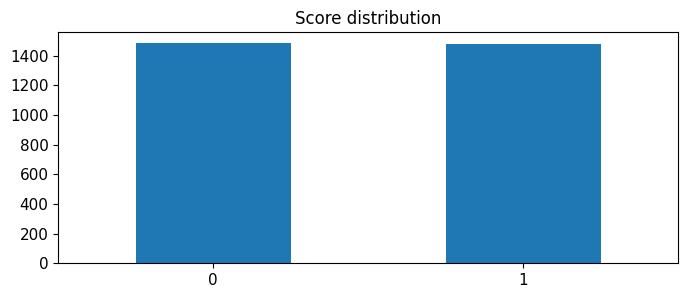

In [34]:
X.score.value_counts().plot(kind = 'bar',
                            title = 'Score distribution',
                            rot = 0, fontsize = 11, figsize = (8,3))

1    503
0    497
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

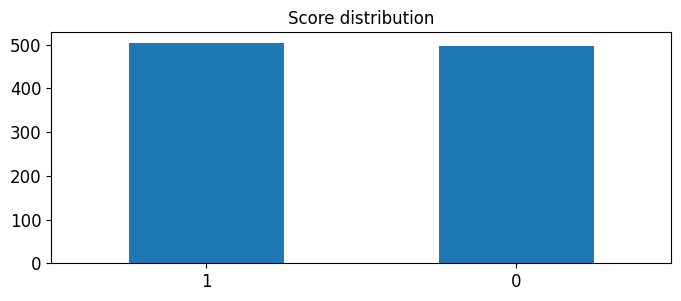

In [35]:
print(X_sample.score.value_counts())

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                   title = 'Score distribution',
                                   rot = 0, fontsize = 12, figsize = (8,3))

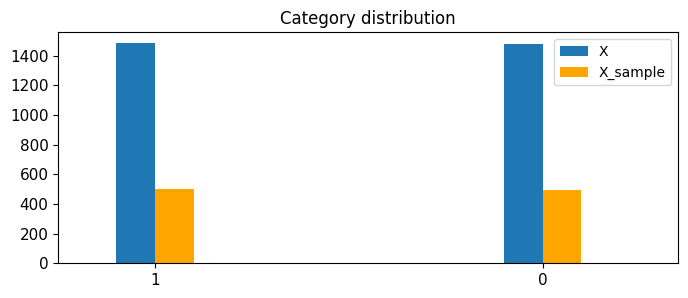

In [36]:
X.score.value_counts().plot(kind = 'bar',
                                    position = 1,
                                    width = 0.1,
                                    title = 'Category distribution',
                                    label = 'X',
                                    rot = 0, fontsize = 11, figsize = (8,3))

X_sample.score.value_counts().plot(kind = 'bar', 
                                           width = 0.1,
                                           color = 'orange',
                                           position = 0,
                                           label = 'X_sample',
                                           rot = 0)


plt.legend()
plt.show()

## 6.Feature Creation

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asede\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [39]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [40]:
X[0:4]

sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [41]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

## 7.Feature subset selection

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])       #(doc#, term index) term_freq => sparse matrix

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [43]:
len(count_vect.get_feature_names_out())

5153

In [44]:
count_vect.get_feature_names_out()[0]  #term and term index example

'00'

In [45]:
count_vect.get_feature_names_out()[2313]    #term and term index example

'in'

In [46]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [47]:
analyze(X.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [48]:
X_counts.shape

(2964, 5153)

In [49]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [50]:
# we convert from sparse array to normal array
X_counts[0:5, 4500:4650].toarray()    #出現次數

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [52]:
print(X.sentence[0])

So there is no way for me to plug it in here in the US unless I go by a converter.


In [53]:
# print all terms in X[0].sentence between term4500 and term4650
i=0
for t in X_counts[0,4500:4650].toarray()[0]:
    if t == 1:
        print(count_vect.get_feature_names_out()[4500 + i])
    i=i+1

the
there
to


In [54]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[30:50]]

In [55]:
# obtain document index
plot_y = ["sentence_"+ str(i) for i in list(X.index)[0:20]]

In [56]:
plot_z = X_counts[0:20, 30:50].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

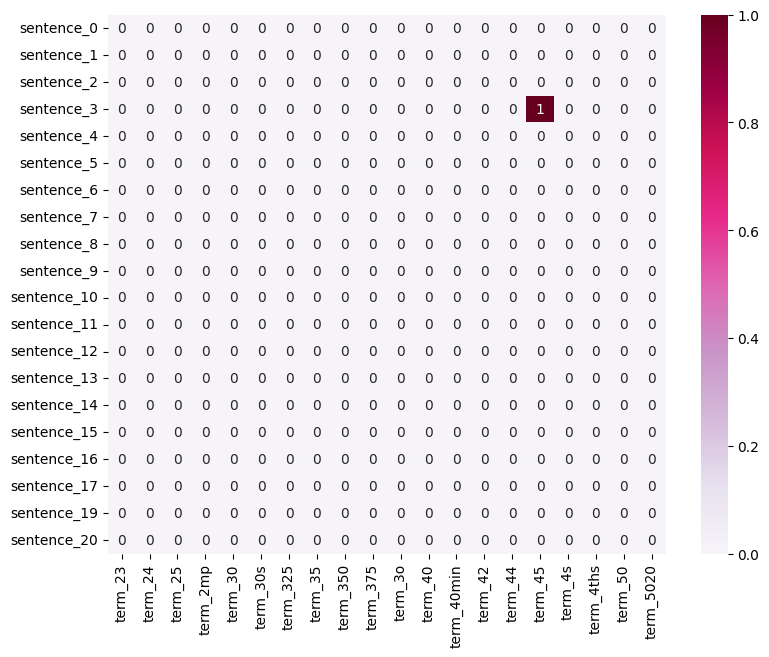

In [57]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

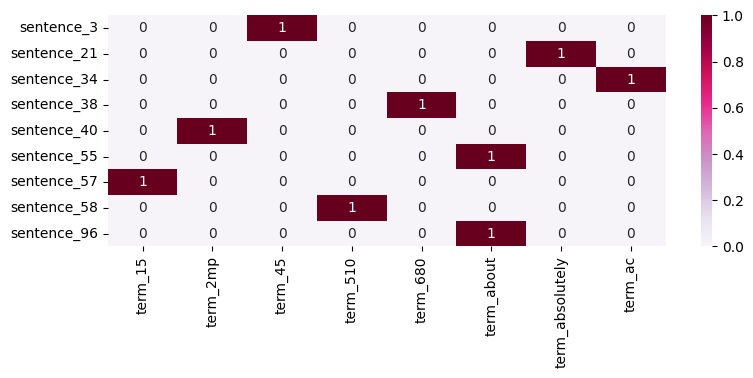

In [58]:
#Visualize 100 sentence and 100 docs with less 0 and smaller size.(Exercise 11)
import numpy as np
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["sentence_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:100].toarray()

plot_z_T = plot_z.T

plot_x = np.array(plot_x)
plot_y = np.array(plot_y)

zero_sentence = []
zero_term =[]

for i in range(plot_z.shape[0]):
    if not np.any(plot_z[i]):
        zero_sentence.append(i)
plot_z = np.delete(plot_z, zero_sentence, 0)
plot_y = np.delete(plot_y, zero_sentence)

for i in range(plot_z.shape[1]):
    if not np.any(plot_z_T[i]):
        zero_term.append(i)
        
plot_z = np.delete(plot_z, zero_term, 1)
plot_x = np.delete(plot_x, zero_term)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 3))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## 8.Dimensionality Reduction

In [59]:
from sklearn.decomposition import PCA

In [60]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())  #5153 => 2

In [61]:
X_reduced.shape

(2964, 2)

In [62]:
X_reduced[X['score'] == '0'].T[0]

array([ 0.51570996, -0.74275188,  0.47383691, ..., -0.50653697,
        0.49136434,  2.32650579])

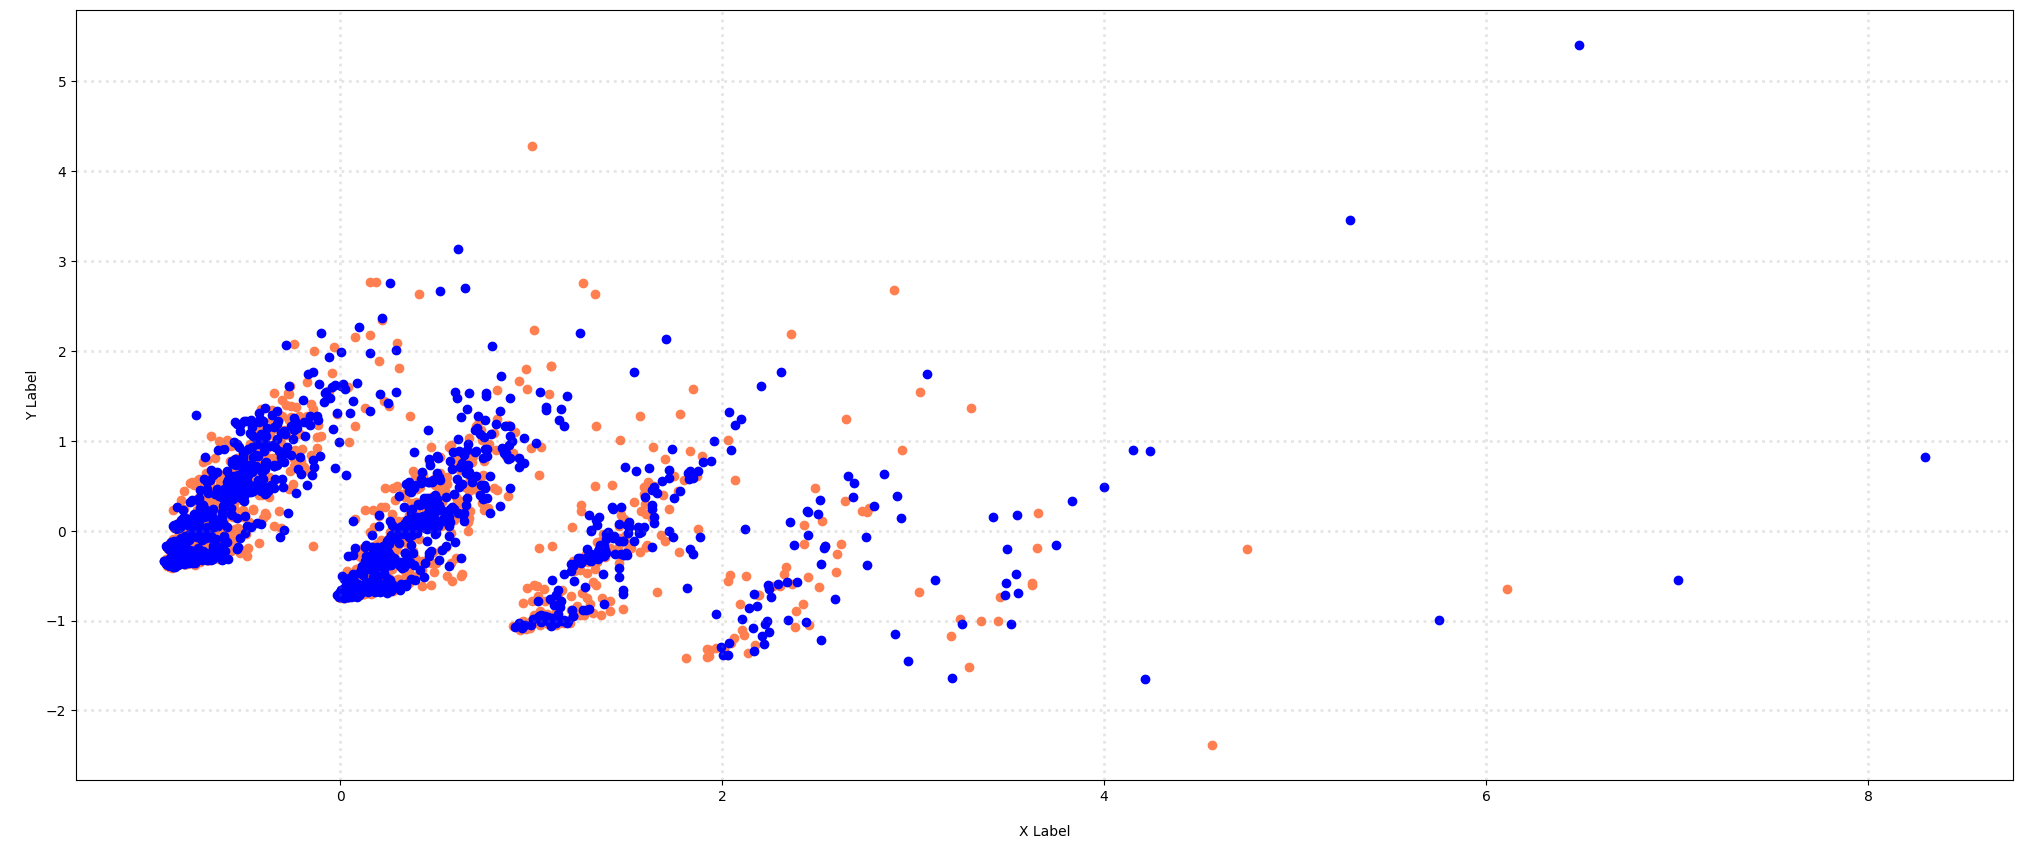

In [63]:
# 2D visualization
# 0 => coral, 1 => blue

col = ['coral', 'blue']
s = ['0','1']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, s):   
    xs = X_reduced[X['score'] == score].T[0]
    ys = X_reduced[X['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

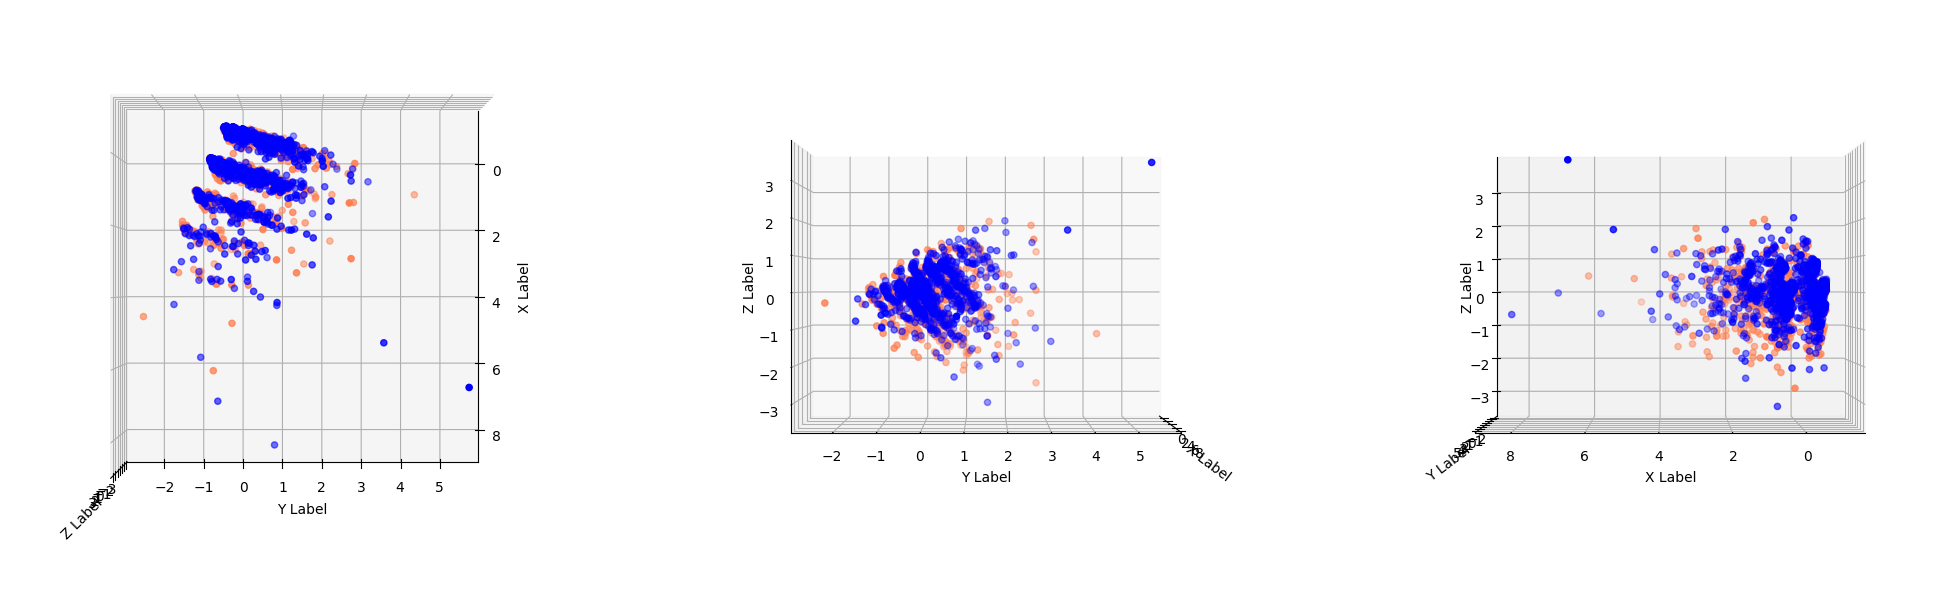

In [64]:
#3D visualization 

X_reduced2 = PCA(n_components = 3).fit_transform(X_counts.toarray())

# plot

fig = plt.figure(figsize = (25,10))


l = [(90, 0, 131), (0, 0, 132), (0, 90, 133)]

for y, z, i in l:
    ax = fig.add_subplot(i, projection = '3d')
    for c, score in zip(col, s):   #zip => [(coral,alt,atheism),(blue,soc.religion.christian)....]
        xs = X_reduced2[X['score'] == score].T[0]
        ys = X_reduced2[X['score'] == score].T[1]
        zs = X_reduced2[X['score'] == score].T[2]
        
        ax.scatter(xs, ys, zs, c = c, marker='o')
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.5)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(y,z)
    


plt.show()

## 9.Attribute Transformation / Aggregation

In [65]:
import numpy as np

In [66]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):  #5153
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [67]:
len(term_frequencies)

5153

In [68]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [69]:
term_frequencies.shape

(5153,)

In [70]:
term_frequencies[0] #sum of first term

1

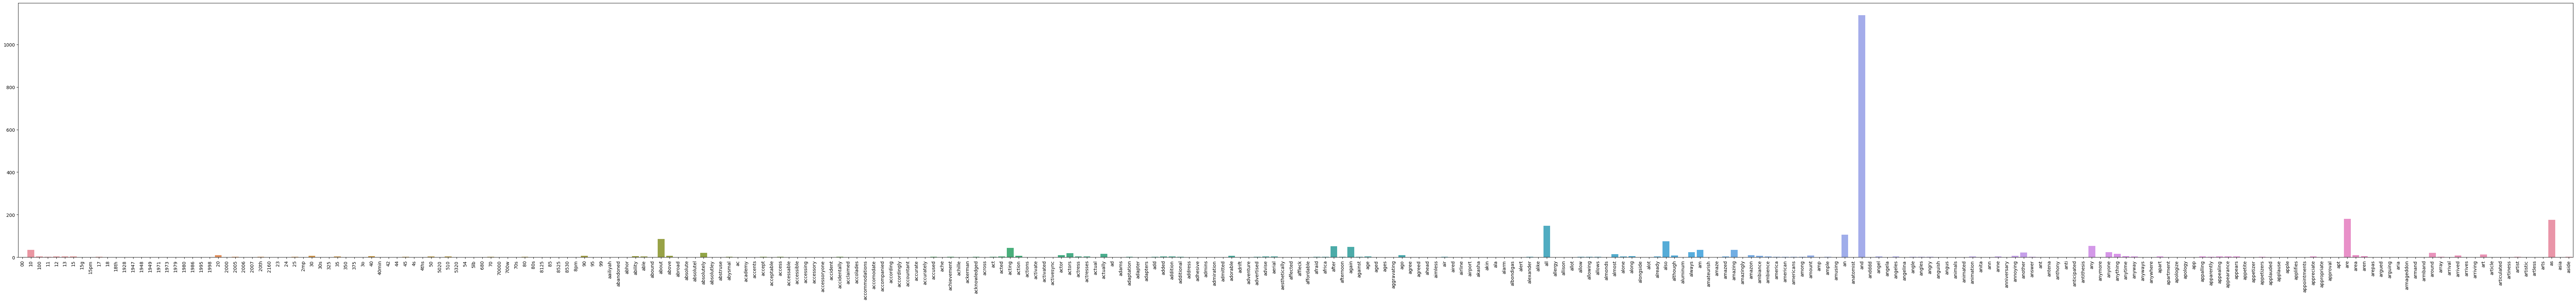

In [71]:
## plot using seaborn
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [72]:
# plot using plotly
import plotly.express as px
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]


print(x.shape)
print(y.shape)
df = pd.DataFrame(np.stack((x,y)).T ,columns = ["term", "frequencies"])
print(df)
px.bar(df, x = "term", y = "frequencies")

(300,)
(300,)
        term frequencies
0         00           1
1         10          34
2        100           3
3         11           2
4         12           4
..       ...         ...
295  artless           1
296     arts           1
297       as         175
298     asia           1
299    aside           2

[300 rows x 2 columns]


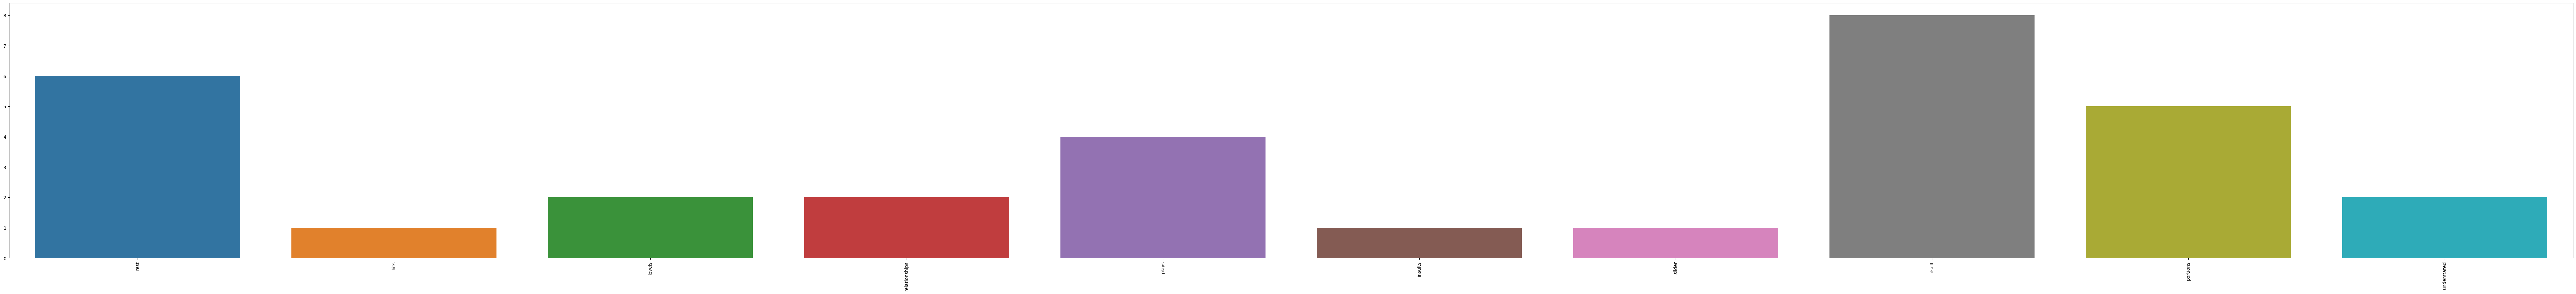

In [73]:
# Answer here

#I choose 10 terms to compute and visualize, but I cannot determine what terms I should choose so I use random to generate a random number between 0 and 35787 as term number. 

import random

x = []
y = []
for i in range(0,10):
    r = random.randint(0,5154)
    x.append(count_vect.get_feature_names_out()[r])
    y.append(X_counts[: ,r].toarray().sum(axis = 0)[0])  #compute the frequency

plt.subplots(figsize=(100, 10))
g = sns.barplot(x = np.array(x), y = np.array(y))
g.set_xticklabels(x, rotation = 90);

In [74]:
# Answer here
df_sort = df.sort_values(by = "frequencies", ascending = False)   #Sort decending by frequencies.
px.bar(df_sort, x = "term", y = "frequencies")

In [75]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

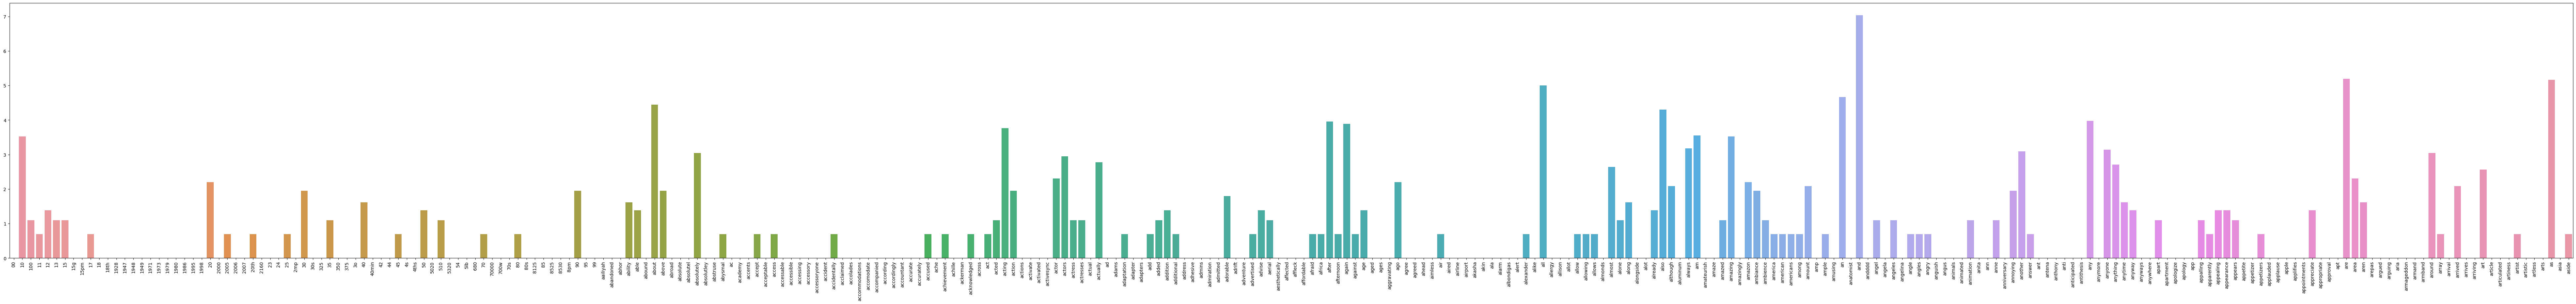

In [76]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## 10.Discretization and Binarization

In [77]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [78]:
mlb = preprocessing.LabelBinarizer()

In [79]:
mlb.fit(X.score)    #Score attribute is binary originally.

LabelBinarizer()

In [80]:
X['bin_score'] = mlb.transform(X['score']).tolist()

In [81]:
X[0:9]

sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   
5  I have to jiggle the plug to get it to line up...     0   
6  If you have several dozen or several hundred c...     0   
7        If you are Razr owner...you must have this!     1   
8                Needless to say, I wasted my money.     0   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

## 11.Data Exploration

In [82]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [83]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [84]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [85]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


In [86]:
print(X.iloc[50].score)
print(X.iloc[100].score)
print(X.iloc[150].score)

1
0
0


# Third

## 1.Visualization

In this part, I use wordcloud to visualize those positive terms, I think this visualization can make us know what terms are good and make us positive when watching this visualization.

In [157]:
# install wordcloud module and NLTK's stopwords
! pip install wordcloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
# Construct positive dataframe from X which score(str)=1
positive = X[X.score=="1"]
print(len(postive))
positive_sentence = positive.sentence.tolist() #change to list 

1480


In [159]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #construct NLTK's stopwords list
print(stop_words)

{'do', 'my', 've', 'd', "won't", 'during', 'their', 'same', 'through', 'ain', 'hers', 'before', 'his', 'will', "you're", 'some', 'shan', 'we', "mightn't", 'between', 'too', 'himself', 'have', "you'll", 'into', 'should', 'they', 'aren', "isn't", 'had', 'all', 'does', 'in', 'on', 'further', 'were', 'once', 'just', "couldn't", 'other', 'here', 'a', 'her', "don't", 'don', 're', 'those', 'up', 'as', 'him', 'now', 'been', 'so', 'what', 'ourselves', 'weren', 'its', 'most', 't', 'or', 'was', 'with', 'mustn', 'but', 'because', 'being', 'y', 'and', 'themselves', 'these', 'needn', "wouldn't", 'there', "wasn't", 'any', 'nor', "doesn't", "shan't", 'which', 'has', "weren't", 'each', 'me', 'll', 'after', 'where', 'did', 'yours', 'mightn', "needn't", 'very', 'than', 'shouldn', 'myself', "didn't", 'out', "hasn't", 'them', 'more', "haven't", 'theirs', 'if', 'not', 'off', 'ma', 'few', 'to', 'isn', 'hadn', 'doing', 'she', "aren't", 'an', 'be', 'at', 'is', 'only', 'whom', 'the', 'then', 'down', 'for', 'won

In [160]:
positive_terms = []      #Record positive terms
for i in range(len(postive)):
    a = dmh.tokenize_text(positive_sentence[i])  #Use function from helper to tokenize positive sentence
    for k in range(len(a)):
        if a[k] not in stop_words:               #If term is not a stopword, then put in positive terms.
            positive_terms.append(a[k])
    

<Figure size 640x480 with 0 Axes>

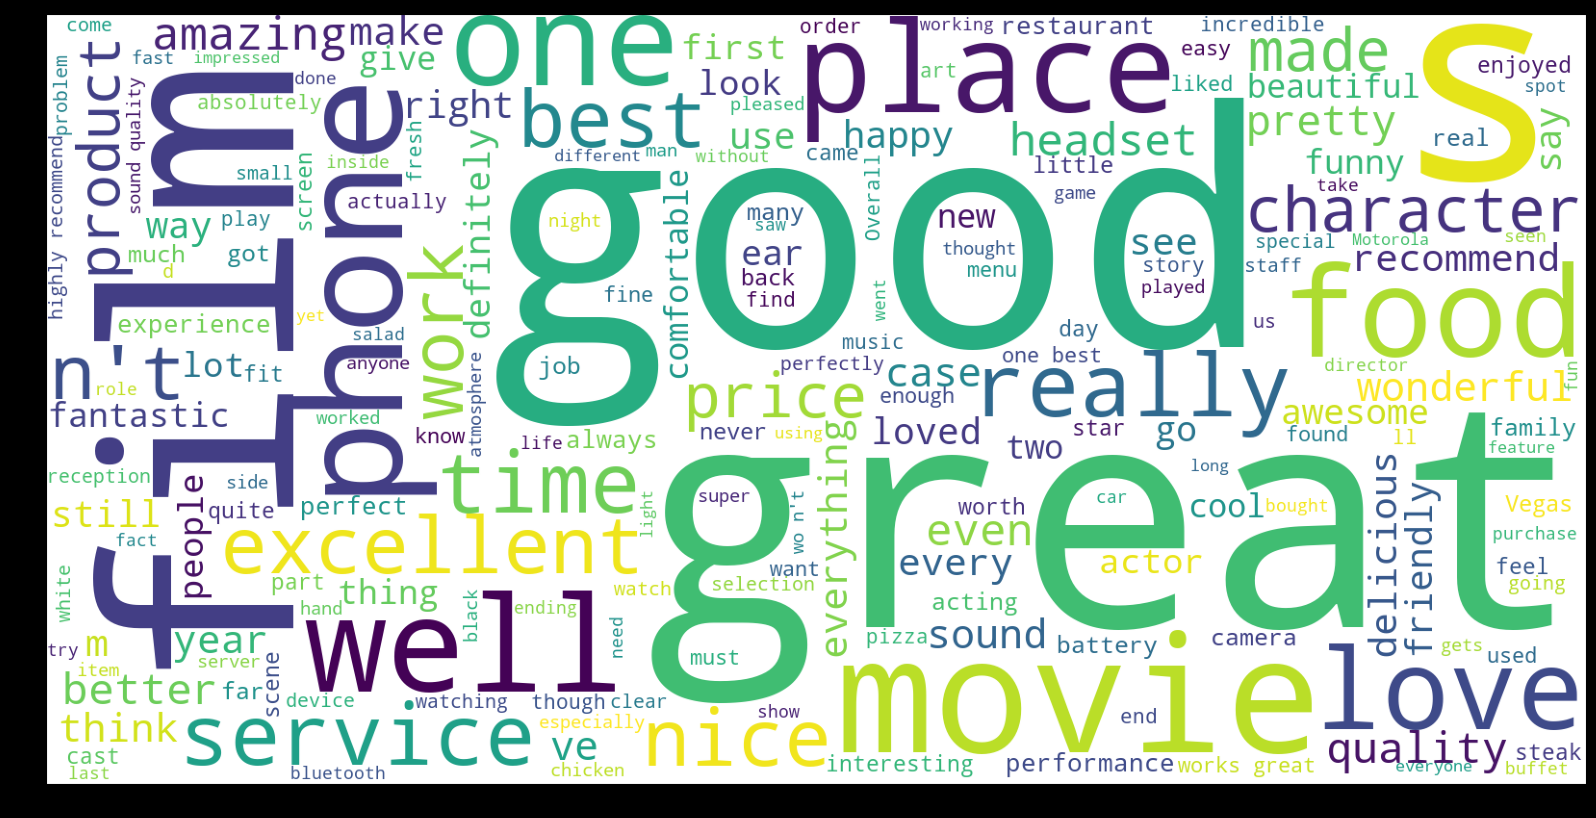

In [161]:
#Wordcloud visualization
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(positive_terms))
plt.figure()
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

Terms that appear more often in positive terms list appear larger in the picture.

## 2.TF-IDF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_TfIdf = vectorizer.fit_transform(X.sentence)
print(X_TfIdf[0])   #(doc#, term index) TF-IDF value

  (0, 1012)	0.3986398226478828
  (0, 646)	0.22333411157151756
  (0, 1981)	0.23146962238496577
  (0, 4791)	0.3320695488303168
  (0, 4833)	0.27547018000685825
  (0, 4529)	0.08648199439792048
  (0, 2157)	0.2227144861750676
  (0, 2313)	0.29513795160676165
  (0, 2431)	0.11951524454431639
  (0, 3385)	0.30875531691564123
  (0, 4607)	0.12737437400320986
  (0, 2808)	0.22860188670215528
  (0, 1828)	0.15660818023693215
  (0, 4985)	0.24912787736240885
  (0, 3042)	0.22333411157151756
  (0, 2426)	0.12067766867318988
  (0, 4543)	0.20753430794826305
  (0, 4159)	0.1873215368376564


In [88]:
vectorizer.get_feature_names_out()[1012] #term and term index example

'converter'

In [89]:
vectorizer.get_feature_names_out()[0]  #term and term index example

'00'

In [90]:
X_TfIdf.shape

(2964, 5153)

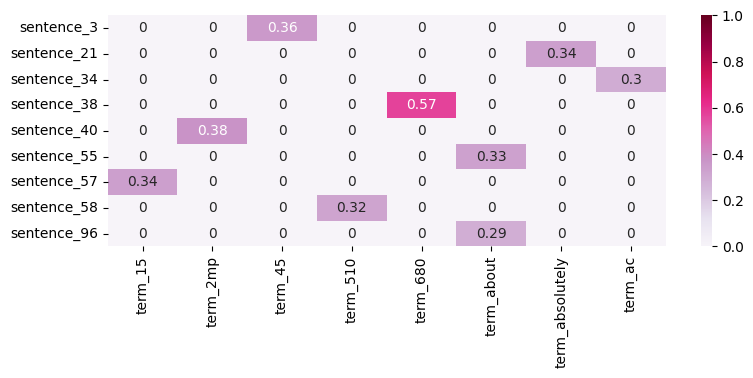

In [91]:
#Visualize TF-IDF valus of 100 terms under the 100 sentences
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[0:100]]
plot_y = ["sentence_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_TfIdf[0:100, 0:100].toarray()

plot_z_T = plot_z.T

plot_x = np.array(plot_x)
plot_y = np.array(plot_y)

zero_doc = []
zero_sentence =[]

for i in range(plot_z.shape[0]):
    if not np.any(plot_z[i]):
        zero_sentence.append(i)
plot_z = np.delete(plot_z, zero_sentence, 0)
plot_y = np.delete(plot_y, zero_sentence)

for i in range(plot_z.shape[1]):
    if not np.any(plot_z_T[i]):
        zero_term.append(i)
        
plot_z = np.delete(plot_z, zero_term, 1)
plot_x = np.delete(plot_x, zero_term)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 3))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## 3.Naive Bayes classifier 

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [101]:
mnb_frequency = MultinomialNB()
mnb_TFIDF = MultinomialNB()
scaler = MinMaxScaler(feature_range=(0, 1))

In [94]:
#Standardization
X_F = scaler.fit_transform(X_counts.toarray())  #Frequency Data
X_TF = scaler.fit_transform(X_TfIdf.toarray())  #TF-IDF Data

In [95]:
#Label
Y1 = X.score[:].to_numpy()
Y2 = Y1

In [96]:
#Split into training and testing data
X_F_train, X_F_test, Y1_train, Y1_test = train_test_split(X_F, Y1, test_size=0.2)   
X_TF_train, X_TF_test, Y2_train, Y2_test = train_test_split(X_TF, Y2, test_size=0.2) 

In [107]:
mnb_frequency.fit(X_F_train, Y1_train) #train

MultinomialNB()

In [108]:
mnb_frequency.predict(X_F_test)
mnb_frequency.score(X_F_test, Y1_test)

0.7841483979763912

In [102]:
mnb_TFIDF.fit(X_TF_train, Y2_train) #train

MultinomialNB()

In [103]:
mnb_TFIDF.predict(X_TF_test)
mnb_TFIDF.score(X_TF_test, Y2_test)

0.7774030354131535

According to the above results, it can be observed that the performance of the classifiers using frequency and TDIDF as features are close.

If my process is not wrong, this result is beyond my expectation, I think classifier using TF-IDF may get better performace in the begining.

I think the reason is some text have obvious positive sentiment or negative sentiment, so classifier can classify simply by checking by checking whether these texts appear.

And only two classes should be classify in this case, so it is not a complex task.

# Forth

## 1.
I think it is less effective to visualize the frequency of each tern in each text before dimension reduction, because it is a big sparse matrix, and we cannot require more useful information from it.

## 2.
I think dataset should remove stopwords when we use frequency as the features, because some term will appear in many text, because it is not meaningful, like "the".